# Calculating the Force of DNA Ejection

The file EjectionForce.py contains an implementation of the calculation of the ejection force decribed in
Purohit, Kindev, Phillips, Mechanics of DNA packaging in viruses, PNAS, vol 100, no 6, 3173-3178, 2003. http://www.pnas.org/content/100/6/3173

The paper calculates the ejection force for different capsid geometries. The spherical and cylindrical capsid geometries are implemented in EjectionForce.py. 

The expression for the force is given by equation 19 of the paper. However before this can be calculated the parameters $d_s$ and $R(d_s)$, which are geometry dependent, must be determined. $R(d_s)$ is found by taking the expression for $L(R)$ given in Table 1 of the paper and solving for $R$. Then, $d_s$ can be calculated by solving the trancendental equation 17 (cylindrical geometry) or 18 (spherical geometry) for $d_s$. After determining $d_s$ and $R(d_s)$, equation 19 can be used to get the ejection force.


The paper shows their result for a cylindrical capsid (modelling the bacteriophage $\Phi29$) in figure 3. To test that the EjectionForce.py calculation works I wrote a test function to reproduce te theory curves in that figure. My test function also calculates the force in a spherical capsid that has the same volume as the cylindrical capsid. Below you can see that the spherical and cylindrical geometries produce essentially identical forces. If you use an interactive plot viewer you can zoom in and see that the force from a spherical capsid is slightly greater than that from a cylindrical capsid. 

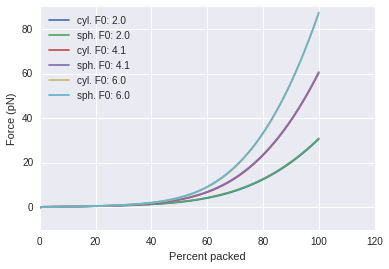

In [3]:
%matplotlib inline
import EjectionForce as ef
import seaborn as sns

ef.test_force_calculations()

The input parameters for this calculation are...
* L: The total contour length of the DNA inside the capsid.
* F0: Characteristic force (actually a pressure) of DNA strand-strand repulsion.
* c: Characteristic length scale of DNA strand-strand repulsion.
* Rout: Radius of capsid cylinder or sphere.
* z: Height of cylindrical capsid (not used for sphere calculation).
* psi_p: DNA persistance length.
* kBT: Thermal energy.
* geom: capsid geometry. Cylindrical 'cyl', or spherical 'sph'.

Any unit system should work, but using pN and nm gives numbers that are in a reasonable range.

## Force Calculation for phage-$\lambda$:
I base our input parameters for our experiments on $\lambda$ on the values used the in the single virus fluorescence ejection paper...

Grayson, P.; Han, L.; Winther, T.; Phillips, R. Real-Time Observations of Single Bacteriophage λ DNA Ejections in Vitro. PNAS 2007, 104 (37), 14652–14657. doi:10.1073/pnas.0737893100

* L_max = 48500$\cdot$0.34 = 16490 nm. This is (number of basepairs)$\cdot$(length of one base pair).
* F0 = 12000 pN/nm^2. This is what was used for the magnesium buffer in the Grayson paper, but the value depends on the solution conditions. I need to spend some time figuring out the best value to use for this for our experiments.
* c = 0.30 nm. Again, this is what was used for the magnesium buffer in the Grayson paper, but the value depends on the solution conditions. I need to spend some time figuring out the best value to use for this for our experiments.
* Rout = 27.5 nm. The capsid is roughly spherical, but is facited so it doesn't have a precisely defined radius. Along the shortest axis it is 50 nm across and along the longest axis it is 60 nm across. I do not see that the Grayson paper specified the radius they used for thier calculation.
* psi_p = 50 nm.
* kBT = We did our experiments at 23 C, so use kBT = 1.38e-23(273.15+23)1e21 =  4.09 pN*nm.
* geom = 'sph'

Below I have plotted ejection force vs. fraction of DNA in the capsid for $\lambda$. As a test to see how sensitive the result is to the input parameters, I included curves where each of the parameters we are uncertain about is increased by 10%. I do not expect the plot below to exactly match figure 5 of the Grayson paper since their experiments were done a different temperature (28 C), and I am not sure about the capsid radius they used for their calculations.


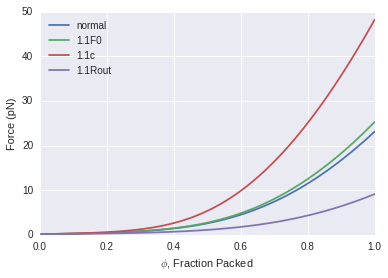

In [4]:
    import matplotlib.pyplot as plt
    import numpy as np
    
    #in units of nm an pN
    L_max = 48500*0.34 # nm
    F0 = 12000. # pN/nm^2
    c = 0.3 # nm
    Rout = 27.5 # nm
    psi_p = 50. # nm
    kBT = 1.38e-23*(273.15+23) *1e12*1e9 # convert to pN and nm
    
    L = np.linspace(0,L_max, 100)

    F_lambda = ef.ejection_force(L, F0, c, Rout = Rout, psi_p = psi_p, kBT = kBT, geom = 'sph')
    F_lambda_F0 = ef.ejection_force(L, F0*1.1, c, Rout = Rout, psi_p = psi_p, kBT = kBT, geom = 'sph')
    F_lambda_c = ef.ejection_force(L, F0, c*1.1, Rout = Rout, psi_p = psi_p, kBT = kBT, geom = 'sph')
    F_lambda_R = ef.ejection_force(L, F0, c, Rout = Rout*1.1, psi_p = psi_p, kBT = kBT, geom = 'sph')


    plt.figure()
    plt.plot(L/L_max, F_lambda, label = 'normal')
    plt.plot(L/L_max, F_lambda_F0, label = '1.1F0')
    plt.plot(L/L_max, F_lambda_c, label = '1.1c')
    plt.plot(L/L_max, F_lambda_R, label = '1.1Rout')

    
    plt.ylabel('Force (pN)')
    plt.xlabel('$\phi$, Fraction Packed')
    plt.legend(loc = 'upper left')

As you can see, the calculation is very sensitive to the parameters c and Rout but the overall shape of the curves is quite similar. Unless we can get very precise estimates for what our input parameters should be I do not trust the force calculation. However, we are interested in variations and quick changes in the friction during ejection, and knowing the absolute magnitudes of the force and friction is not necessary for investigating these.